# In this notebook, I perform the preliminary data analysis and make it ready for training.
-------------------------------------------------------------------------------------------------------------------
# Technology used: basic scipy and pandas tools

I start with the usual utility cells

In [1]:
# packages used for processing:
import cPickle as pickle # for pickling the processed data
import matplotlib.pyplot as plt # for visualization
import numpy as np # numerical computations

# for operating system related stuff
import os
import sys # for memory usage of objects
from subprocess import check_output

# the boss of frameworks
import tensorflow as tf

# reading and formatting the csv based files:
import pandas as pd

# to plot the images inline
%matplotlib inline

In [2]:
# apply the seaborn makeup on the plots drawn using matplotlib
import seaborn as sns
sns.set(color_codes=True)

In [3]:
# Input data files are available in the "../Data/" directory.

def exec_command(cmd):
    '''
        function to execute a shell command and see it's 
        output in the python console
        @params
        cmd = the command to be executed along with the arguments
              ex: ['ls', '../input']
    '''
    print(check_output(cmd).decode("utf8"))

In [4]:
# check the structure of the project directory
exec_command(['ls', '..'])

Data
LICENSE
Models
README.md
Scripts



In [5]:
''' Set the constants for the script '''

# various paths of the files
data_path = "../Data" # the data path

data_files = {
    "train": os.path.join(data_path, "train.csv"),
    "test": os.path.join(data_path, "test.csv")
}

base_model_path = '../Models'

plug_and_play_data_file_path = os.path.join(data_path, "plug_and_play.pickle")

# Let's get started with it:

In [6]:
# read the train csv file to obtain the data in a pandas dataframe
raw_data = pd.read_csv(data_files["train"])

In [7]:
# print the shape of the input raw_data
print "The shape of the input data: " + str(raw_data.shape)

The shape of the input data: (595212, 59)


#### View a small snapshot of the raw_data

In [8]:
raw_data.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


## Some information on the data:
-------------------------------------------------------------------------------------------------------------------
data_source => https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data <br><br>
## to_predict: target
features with postfix <b>bin</b> are binary features. <br>
features with postfix <b>cat</b> are categorical features. <br>
features without any postfix are normal continuous features <br> <br>

-------------------------------------------------------------------------------------------------------------------
<b> finally, all missing values are denoted by -1 </b>

In [9]:
print "Total number of featuers to work on: " + str(len(raw_data.columns ) - 2)
# minus two for: target and id

Total number of featuers to work on: 57


### Let's plot division grams for all the binary features

In [10]:
# find all the binary columns:
all_columns = raw_data.columns 
binary_features = filter(lambda x: "bin" in x, all_columns)

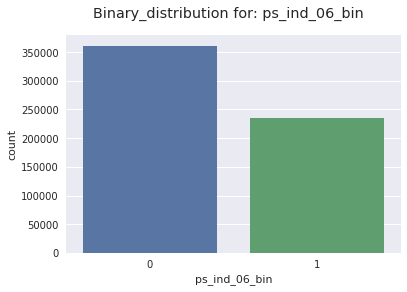

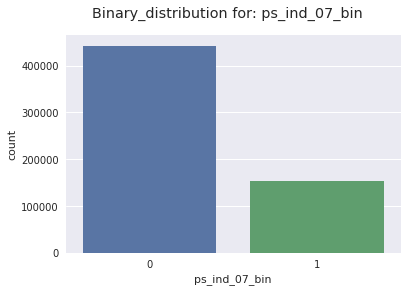

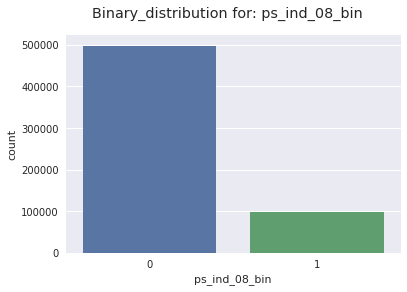

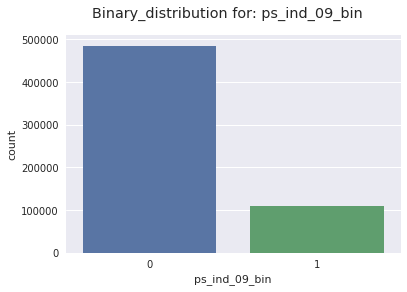

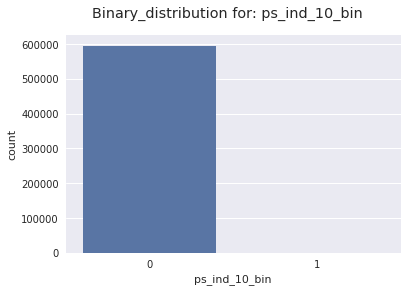

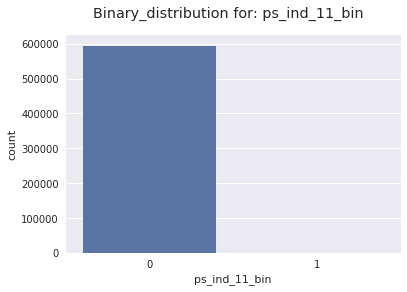

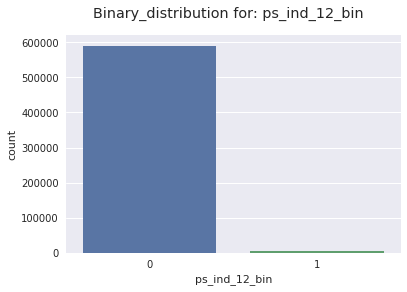

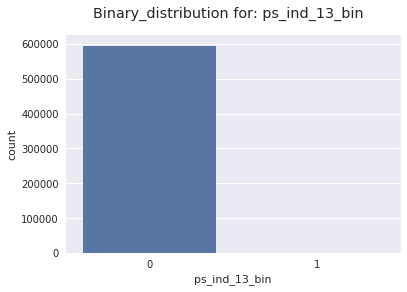

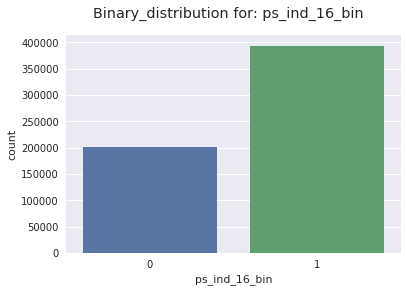

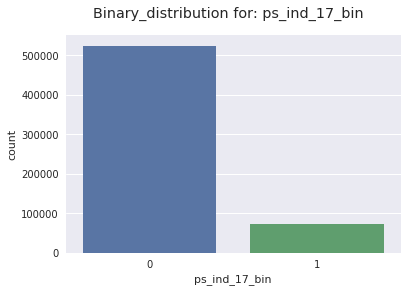

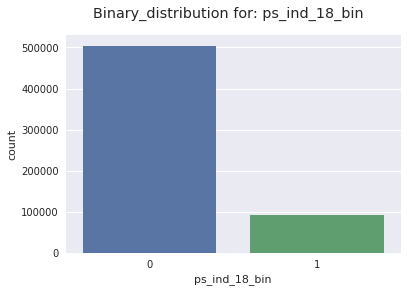

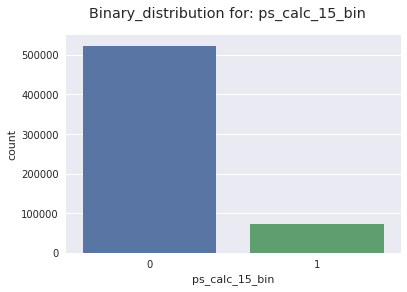

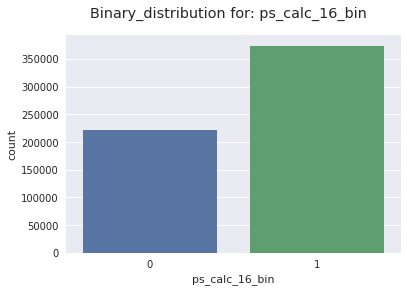

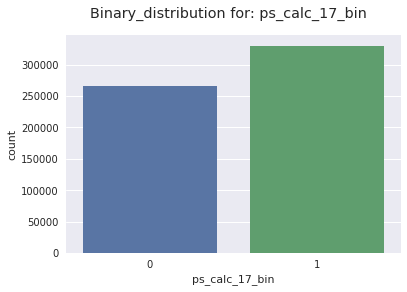

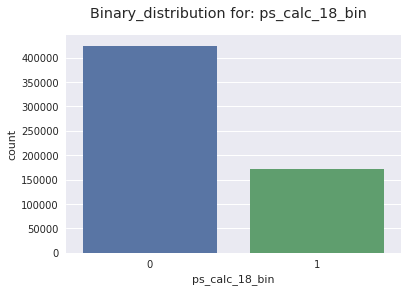

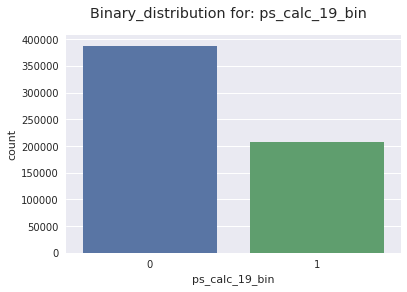

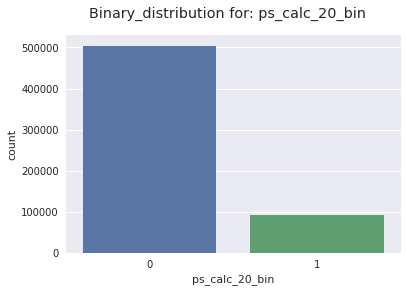

In [11]:
for binary_feature in binary_features:
    # plot the histogram of that feature
    plt.figure().suptitle("Binary_distribution for: " + str(binary_feature))
    sns.countplot(x=binary_feature, data=raw_data)

Well this is odd. for the features ps_ind_10_bin, ps_ind_11_bin and ps_ind_13_bin, there are no '1' values. Let's check this fact manually

In [12]:
print "For ps_ind_10_bin: "
print "total examples: " + str(len(raw_data["ps_ind_10_bin"]))
print "1 values: " + str(len(np.where(raw_data["ps_ind_10_bin"] == 1)[0]))

For ps_ind_10_bin: 
total examples: 595212
1 values: 222


In [13]:
print "For ps_ind_11_bin: "
print "total examples: " + str(len(raw_data["ps_ind_11_bin"]))
print "1 values: " + str(len(np.where(raw_data["ps_ind_11_bin"] == 1)[0]))

For ps_ind_11_bin: 
total examples: 595212
1 values: 1007


In [14]:
print "For ps_ind_13_bin: "
print "total examples: " + str(len(raw_data["ps_ind_13_bin"]))
print "1 values: " + str(len(np.where(raw_data["ps_ind_13_bin"] == 1)[0]))

For ps_ind_13_bin: 
total examples: 595212
1 values: 564


Alright! So there are some rare 1s in those suspicious features. Not to worry too much

# Anyway, there are a lot more plots that we can visualize and see for ourselves how the features are correlated. However, I am going to use the deeplearning approach which should waive the need of feature engineering

In [16]:
for column in raw_data.columns[2:]:
    print "Column Name: " + column
    print raw_data[column].describe()
    print "\n\n"

Column Name: ps_ind_01
count    595212.000000
mean          1.900378
std           1.983789
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           7.000000
Name: ps_ind_01, dtype: float64



Column Name: ps_ind_02_cat
count    595212.000000
mean          1.358943
std           0.664594
min          -1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: ps_ind_02_cat, dtype: float64



Column Name: ps_ind_03
count    595212.000000
mean          4.423318
std           2.699902
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          11.000000
Name: ps_ind_03, dtype: float64



Column Name: ps_ind_04_cat
count    595212.000000
mean          0.416794
std           0.493311
min          -1.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: ps_ind_04_cat, dtype: float64



Column Name: ps_

count    595212.000000
mean          0.379945
std           0.058327
min          -1.000000
25%           0.316228
50%           0.374166
75%           0.400000
max           1.264911
Name: ps_car_12, dtype: float64



Column Name: ps_car_13
count    595212.000000
mean          0.813265
std           0.224588
min           0.250619
25%           0.670867
50%           0.765811
75%           0.906190
max           3.720626
Name: ps_car_13, dtype: float64



Column Name: ps_car_14
count    595212.000000
mean          0.276256
std           0.357154
min          -1.000000
25%           0.333167
50%           0.368782
75%           0.396485
max           0.636396
Name: ps_car_14, dtype: float64



Column Name: ps_car_15
count    595212.000000
mean          3.065899
std           0.731366
min           0.000000
25%           2.828427
50%           3.316625
75%           3.605551
max           3.741657
Name: ps_car_15, dtype: float64



Column Name: ps_calc_01
count    595212.000000
mean    

In [47]:
def normalize_data_frame(data):
    '''
        function to normalize the pandas dataframe and convert it into a numpy array
        @param
        data => the pandas dataframe
        @return => features array, labels array, means of the features, variances of the features
    '''
    
    # extract the labels from the dataframe
    labels = np.array(data["target"]).reshape(1, -1)
    
    # create an empty data structure to hold all the data
    features = np.ndarray(shape = (len(data.columns) - 2, data.id.count()))
    means = np.ndarray(shape = (len(data.columns) - 2, 1)) # column vector for all the means
    variances = np.ndarray(shape = (len(data.columns) - 2, 1)) # column vector for the variances
    
    # iterate over all the columns and insert their slices into the features array after normalizing them
    count = 0; # start the counter from 0 and perform the required stuff
    for column in data.columns[2:]:
        feature_slice = np.array(data[column]).reshape(1, -1) # carve out the feature slice
        mean = data[column].mean()
        variance = data[column].std() ** 2
        
        feature_slice = feature_slice - mean # mean cancellation
        feature_slice = feature_slice / variance # variance normalization
        
        # add the slice to the features vector
        features[count, :] = feature_slice
        
        # add the mean and variance to their respective arrays
        means[count] = mean; variances[count] = variance
        
        # do not forget to increment the counter
        count += 1
    
    return features, labels, means, variances

In [48]:
features, labels, means, variances = normalize_data_frame(raw_data)

In [50]:
features.shape, labels.shape, means.shape, variances.shape

((57, 595212), (1, 595212), (57, 1), (57, 1))

In [53]:
# print the means and variances
print np.stack((means, variances), axis=1)[: 5]

[[[ 1.90037835]
  [ 3.93541926]]

 [[ 1.3589427 ]
  [ 0.44168533]]

 [[ 4.42331808]
  [ 7.2894706 ]]

 [[ 0.41679435]
  [ 0.24335612]]

 [[ 0.4051884 ]
  [ 1.82423459]]]


In [54]:
# print a small slice of the input data
print features[:, :2] # display the first two examples

[[  0.02531411  -0.22878842]
 [  1.45138915  -0.81266609]
 [  0.07911163   0.35347998]
 [  2.39651111  -1.71269311]
 [ -0.2221142   -0.2221142 ]
 [ -1.64946017  -1.64946017]
 [  3.89054769  -1.34595216]
 [ -1.19605782   6.10047352]
 [ -1.22744923  -1.22744923]
 [ -1.00037143  -1.00037143]
 [ -1.00169302  -1.00169302]
 [ -1.00952689  -1.00952689]
 [ -1.00094678  -1.00094678]
 [ -0.76538239  -0.76538239]
 [  0.29425452  -0.341958  ]
 [ -2.94831139  -2.94831139]
 [  8.25890466  -1.13775966]
 [ -1.1812578    6.51693254]
 [  1.07578531   2.28441576]
 [ -1.46353133  -0.2397629 ]
 [  0.26517608   0.3414204 ]
 [  0.27085567   0.42980229]
 [  1.20477375   1.20477375]
 [ -0.7960134   -0.7960134 ]
 [ -0.15637893  -0.15637893]
 [  1.62365561  -1.18123457]
 [ -0.08442968   0.14685374]
 [  0.74677048   0.74677048]
 [ -5.95520671   1.2018055 ]
 [ -1.38722823   0.70057243]
 [  0.93691299   0.93691299]
 [ -0.04607694  -0.03965388]
 [ -0.49928401   0.9434346 ]
 [  5.89505765 -18.72910569]
 [  1.39600522

In [55]:
# print a small slice of the input # print a small slice of the input data
print features[:, :2] # display the first two exampleslabels
print labels[:, :2] # display the first two labels

[[0 0]]


# Now, last step is to pickle this processed data into a plug and play format to proceed further

In [60]:
# function to pickle an object 

def pickleIt(obj, save_path):
    '''
        function to pickle the given object.
        @param
        obj => the python object to be pickled
        save_path => the path where the pickled file is to be saved
        @return => nothing (the pickle file gets saved at the given location)
    '''
    if(not os.path.isfile(save_path)):
        with open(save_path, 'wb') as dumping:
            pickle.dump(obj, dumping, protocol=pickle.HIGHEST_PROTOCOL)
        
        print "The file has been pickled at: " + save_path
        
    else:
        print "The pickle file already exists: " + save_path

In [64]:
# function to unpickle the given file and load the obj back into the python environment

def unPickleIt(pickle_path): # might throw the file not found exception
    '''
        function to unpickle the object from the given path
        @param 
        pickle_path => the path where the pickle file is located
        @return => the object extracted from the saved path
    '''
    
    with open(pickle_path, 'rb') as dumped_pickle:
        obj = pickle.load(dumped_pickle)
        
    return obj # return the unpickled object

In [65]:
# create the dictionary to pickle the file
data_dict = {
    "features": features,
    "labels": labels,
    "means": means,
    "variances": variances
}

In [66]:
# now pickle this data_dict
pickleIt(data_dict, plug_and_play_data_file_path)

The pickle file already exists: ../Data/plug_and_play.pickle


In [67]:
# perform naive checking by loading the pickled data back into the structure
naive_checking_data_dict = unPickleIt(plug_and_play_data_file_path)
len(naive_checking_data_dict)

4

# Alright the data has been normalized and converted into a numpy array. We can now proceed further with construction of a nerual network.